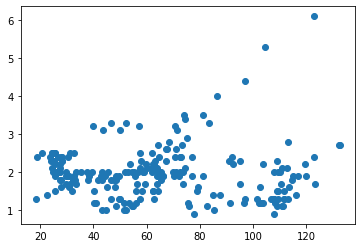

In [19]:
import pandas as pd
data = pd.read_csv('data_merged.csv', index_col=0)

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
target = "Inflation_Rate"
features = list(train_set.columns)
features = [x for x in features if x not in ['Date', "Inflation_Rate"]]

X_train = train_set[features]
y_train = train_set[[target]]
X_test = test_set[features]
y_test = test_set[[target]]
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly.fit(X_train)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

import matplotlib.pyplot as plt

plt.scatter(X_train[:, 2], y_train)
plt.show()

In [20]:
print("Original number of features: "+str(len(features)))
print("Final number of features: "+str(X_train.shape[1]))



Original number of features: 7
Final number of features: 36


In [21]:
import numpy as np
array_of_features = np.array(features)
feature_names_transformed = poly.get_feature_names_out(array_of_features)
feature_names_transformed

array(['1', 'Prime_Rate', 'Crude_prices', '10_year_bond',
       'manu_labor_rate', 'CAD_M1_MoneySupply', 'USD_CAD_rate',
       'SNP_TSX_Close', 'Prime_Rate^2', 'Prime_Rate Crude_prices',
       'Prime_Rate 10_year_bond', 'Prime_Rate manu_labor_rate',
       'Prime_Rate CAD_M1_MoneySupply', 'Prime_Rate USD_CAD_rate',
       'Prime_Rate SNP_TSX_Close', 'Crude_prices^2',
       'Crude_prices 10_year_bond', 'Crude_prices manu_labor_rate',
       'Crude_prices CAD_M1_MoneySupply', 'Crude_prices USD_CAD_rate',
       'Crude_prices SNP_TSX_Close', '10_year_bond^2',
       '10_year_bond manu_labor_rate', '10_year_bond CAD_M1_MoneySupply',
       '10_year_bond USD_CAD_rate', '10_year_bond SNP_TSX_Close',
       'manu_labor_rate^2', 'manu_labor_rate CAD_M1_MoneySupply',
       'manu_labor_rate USD_CAD_rate', 'manu_labor_rate SNP_TSX_Close',
       'CAD_M1_MoneySupply^2', 'CAD_M1_MoneySupply USD_CAD_rate',
       'CAD_M1_MoneySupply SNP_TSX_Close', 'USD_CAD_rate^2',
       'USD_CAD_rate SNP_TSX

In [25]:
X_trainain_Categorical = pd.DataFrame(X_train, columns=feature_names_transformed)
X_trainain_Categorical

# X_tr_Categorical_index_ = X_trainain_Categorical.set_index(train_set.index) 
# X_tr_Categorical_index_
# X_tr_Non_Categorical_index_ = list(pd.DataFrame(X_train).drop(X_tr_Categorical_index_, axis = 1))
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[2.4498417] [[-4.01260048e-15  1.40177948e-16 -1.31983112e-21  6.76642733e-23
   4.68771206e-23 -7.10656058e-12  2.40361197e-23 -7.94760192e-20
   5.27667824e-22 -2.10073822e-21  6.10041158e-22  1.37923652e-21
   1.38977699e-13  1.88735144e-22  1.82429220e-19 -5.77947015e-20
  -3.85884599e-21 -1.52128177e-20  1.13993250e-14 -5.25838492e-22
  -8.04347438e-18  6.56259335e-22  1.17361752e-21  3.88880171e-13
   1.87504393e-22  7.58093002e-20  3.62152321e-21  1.69814374e-14
   5.51742396e-22  4.06299503e-19  2.32735453e-24  1.90699971e-12
  -4.03753404e-17  6.17216098e-23  1.53520377e-19 -2.94975310e-16]]


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(X_train_Non_Categorical_index_)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(X_train_Categorical_index_))
    ])


from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),    
    
    ])

# Convert the X_train and X_test lists into DataFrames, before transforming the data.
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train_transform = full_pipeline.fit_transform(X_train)
X_test_transform = full_pipeline.transform(X_test)

# Apply Poly transformations on the y_train and y_test DataFrames
from sklearn.preprocessing import StandardScaler

number_pipeline = Pipeline([('std_scaler', StandardScaler())])

Y_train_transform = number_pipeline.fit_transform(y_train)
Y_test_transform = number_pipeline.transform(y_test)


NameError: name 'X_train_Non_Categorical_index_' is not defined